# Ensemble model

In [1]:
%load_ext autoreload
%autoreload 2

In [62]:
import os
os.chdir('../src/')
import json
import pandas as pd
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from modules.forecasting_module import ForecastingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig
from configs.base_config import ForecastingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

In [96]:
with open('../config/sample_homogeneous_train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

## Train-eval-plot step by step

In [103]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/31/20',
 'train1_end_date': '6/6/20',
 'train1_run_day': '5/30/20',
 'train2_start_date': '6/7/20',
 'train2_end_date': '6/14/20',
 'train2_run_day': '6/6/20',
 'test_start_date': '6/7/20',
 'test_end_date': '6/14/20',
 'test_run_day': '6/6/20'}

In [104]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 2
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "../outputs/del-testing.json"

In [105]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/31/20',
 'train_end_date': '6/6/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'}},
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12],
  'beta': [0, 2]},
 'search_parameters': {'max_evals': 2},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable': 

## Sample Code for training just the constituent models

In [106]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [107]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                             
t = 7.90                                             
100%|██████████| 2/2 [00:00<00:00, 14.17trial/s, best loss: 1172.2873627090096]
t = 7.90
t = 7.90


In [108]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 68.3806036835617,
    'F_fatalities': 0.0604718939348968,
    'F_hospitalization': 0.045676557957691946,
    'IbyCRatio': 1.2324364964447612,
    'infectious_period': 1.363033484627215,
    'r0': 1.3311366446163426}},
  'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 56.480487296651845,
     'F_fatalities': 0.0582292061209231,
     'F_hospitalization': 0.06781813450675897,
     'IbyCRatio': 1.9427281404862546,
     'infectious_period': 5.309753472692751,
     'r0': 2.5197634484349356,
     'LatentEbyCRatio': {'5/30/20': 56.480487296651845,
      '6/6/20': 2.0414207924036822},
     'LatentIbyCRatio': {'5/30/20': 1.9427281404862546,
      '6/6/20': 0.2954689068126492}}},
   '1'

## Sample Code for training just the beta
### (Expects constituent models in the config)

In [109]:
with open('../config/sample_homogeneous_train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 10
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

default_train_config['model_parameters'].update(training_output['model_parameters'])
default_train_config['model_parameters']['modes']['training_mode'] = 'only_beta'
# default_train_config['search_space'] = {'beta': [0,2]}

In [110]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/31/20',
 'train_end_date': '6/6/20',
 'model_class': 'homogeneous_ensemble',
 'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 68.3806036835617,
    'F_fatalities': 0.0604718939348968,
    'F_hospitalization': 0.045676557957691946,
    'IbyCRatio': 1.2324364964447612,
    'infectious_period': 1.363033484627215,
    'r0': 1.3311366446163426}},
  'modes': {'training_mode': 'only_beta', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 56.480487296651845,
     'F_fatalities': 0.0582292061209231,
     'F_hospitalization': 0.06781813450675897,
     'IbyCRatio': 1.9427281404862546,
     'infectious_period': 5.309753472692751,
     'r0': 2.5197634484349

In [111]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)
training_output = TrainingModule.from_config(train_config)

t = 7.90                                              
t = 7.90                                              
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.90                                                           
t = 7.

In [112]:
training_output

{'model_parameters': {'child_model': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 68.3806036835617,
    'F_fatalities': 0.0604718939348968,
    'F_hospitalization': 0.045676557957691946,
    'IbyCRatio': 1.2324364964447612,
    'infectious_period': 1.363033484627215,
    'r0': 1.3311366446163426}},
  'modes': {'training_mode': 'only_beta', 'predict_mode': 'mean'},
  'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 56.480487296651845,
     'F_fatalities': 0.0582292061209231,
     'F_hospitalization': 0.06781813450675897,
     'IbyCRatio': 1.9427281404862546,
     'infectious_period': 5.309753472692751,
     'r0': 2.5197634484349356,
     'LatentEbyCRatio': {'5/30/20': 56.480487296651845,
      '6/6/20': 2.0414207924036822},
     'LatentIbyCRatio': {'5/30/20': 1.9427281404862546,
      '6/6/20': 0.2954689068126492}}},
   '1': {'model

## Sample Code for full training
### (Half train period for constituent models, half for beta)

In [113]:
with open('../config/sample_homogeneous_train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 10
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

default_train_config['model_parameters'].update(training_output['model_parameters'])
default_train_config['model_parameters']['modes']['training_mode'] = 'full'
# default_train_config['search_space'] = {'beta': [0,2]}

In [114]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)
training_output = TrainingModule.from_config(train_config)

{'r0': [0.5, 3], 'EbyCRatio': [0.001, 70], 'IbyCRatio': [0.001, 2], 'infectious_period': [1, 10], 'F_hospitalization': [0, 0.125], 'F_fatalities': [0.02, 0.12], 'beta': [0, 2]}
t = 4.90                                              
t = 4.90                                              
t = 4.90                                                                       
t = 4.90                                                                       
t = 4.90                                                                       
t = 4.90                                                                       
t = 4.90                                                                        
t = 4.90                                                                        
t = 4.90                                                                        
t = 4.90                                                                        
100%|██████████| 10/10 [00:00<00:00, 14.74trial/s, best loss: 126.094

t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
100%|██████████| 10/10 [00:06<00:00,  1.66trial/s, best loss: 216.53970397975422]
Best fit: {'beta': 1.543245835071264}
Best Loss: 216.53970397975422


In [115]:
training_output

{'child_model': {'model_class': 'SEIHRD',
  'model_parameters': {'incubation_period': 5,
   'F_icu': 0.05,
   'EbyCRatio': 67.45139290143912,
   'F_fatalities': 0.0630227183750274,
   'F_hospitalization': 0.00015279481974880826,
   'IbyCRatio': 1.709607633375551,
   'infectious_period': 1.1131666971739174,
   'r0': 2.0351666600061264}},
 'modes': {'training_mode': 'full', 'predict_mode': 'mean'},
 'constituent_models': {'0': {'model_class': 'SEIHRD',
   'model_parameters': {'incubation_period': 5,
    'F_icu': 0.05,
    'EbyCRatio': 7.3233303480433145,
    'F_fatalities': 0.07160454910874223,
    'F_hospitalization': 0.12442546364515589,
    'IbyCRatio': 1.5963817136857332,
    'infectious_period': 6.148111826481756,
    'r0': 1.8423771036139294,
    'LatentEbyCRatio': {'5/30/20': 7.3233303480433145,
     '6/3/20': 2.1649572632465066},
    'LatentIbyCRatio': {'5/30/20': 1.5963817136857332,
     '6/3/20': 0.17599198283642958}}},
  '1': {'model_class': 'SEIHRD',
   'model_parameters': {'

## Sample Code for forecasting

In [16]:
with open('../config/sample_homogeneous_forecast_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_forecast_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

default_forecast_config['region_name'] = ['bengaluru urban']
default_forecast_config['region_type'] = 'district'
default_forecast_config['forecast_start_date'] = test_start_date
default_forecast_config['forecast_end_date'] = test_end_date
default_forecast_config['run_day'] = test_run_day
default_forecast_config['data_source'] = "tracker_district_daily"
default_forecast_config['output_filepath'] = "testing"
default_forecast_config['model_parameters']['uncertainty_parameters']['include_mean'] = True

In [17]:
forecast_config = ForecastingModuleConfig.parse_obj(default_forecast_config)
forecast_config

ForecastingModuleConfig(data_source='tracker_district_daily', region_name=['bengaluru urban'], region_type='district', model_class=<ModelClass.homogeneous_ensemble: 'homogeneous_ensemble'>, model_parameters={'child_model': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05}}, 'modes': {'training_mode': 'constituent_models', 'predict_mode': 'mean_predictions'}, 'constituent_models': {'0': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio': 28.16604550441872, 'F_fatalities': 0.02466701801276612, 'F_hospitalization': 0.06963507606419204, 'IbyCRatio': 1.4785269422997283, 'infectious_period': 5.42824969419175, 'r0': 2.0045875407735303, 'LatentEbyCRatio': {'5/27/20': 28.16604550441872, '6/3/20': 1.6812382970858852}, 'LatentIbyCRatio': {'5/27/20': 1.4785269422997283, '6/3/20': 0.26879511010742685}}}, '1': {'model_class': 'SEIHRD', 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05, 'EbyCRatio': 68.6169116

In [18]:
forecasting_output = ForecastingModule.from_config(forecast_config)

t = 8.90
t = 8.90


In [19]:
forecasting_output

,Region Type,Region,Country,Lat,Long,prediction_type,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20
0,district,bengaluru urban,India,20,70,exposed,630.165699,607.917446,614.961169,642.018432,683.363436,736.492414,799.098336,870.551024
1,district,bengaluru urban,India,20,70,icu_mean,4.564251,3.962583,4.137698,4.617762,5.212335,5.859424,6.533106,7.239914
2,district,bengaluru urban,India,20,70,recovered_mean,344.286713,401.321911,455.684531,514.634882,580.910784,655.629449,739.309452,832.329161
3,district,bengaluru urban,India,20,70,deceased_mean,8.707310,10.149780,11.524657,13.015563,14.691738,16.581438,18.697778,21.050327
4,district,bengaluru urban,India,20,70,confirmed_mean,444.279051,490.723352,549.963147,620.005682,699.849217,789.399372,888.669356,998.177764
5,district,bengaluru urban,India,20,70,hospitalized_mean,91.285028,79.251661,82.753959,92.355237,104.246695,117.188485,130.662126,144.798276
6,district,bengaluru urban,India,20,70,active_mean,91.285028,79.251661,82.753959,92.355237,104.246695,117.188485,130.662126,144.798276
7,district,bengaluru urban,India,20,70,infected,212.444573,289.313908,351.938326,407.251963,459.801777,511.979686,566.107297,623.423530
8,district,bengaluru urban,India,20,70,final,352.994023,411.471690,467.209188,527.650446,595.602522,672.210887,758.007230,853.379488


In [20]:
ensemble_train_config['model_parameters']['constituent_models'] = training_output['model_parameters']['constituent_models']

In [21]:
ensemble_train_config['model_parameters']['constituent_model_losses'] = training_output['model_parameters']['constituent_model_losses']

In [22]:
ensemble_train_config['model_parameters']['modes']['predict_mode'] = 'without_uncertainty'

In [23]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'train_start_date': '',
 'train_end_date': '',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 3.0355865552573826,
     'F_fatalities': 0.05236163703523315,
     'F_hospitalization': 0.038389934344751075,
     'IbyCRatio': 1.3562231831212739,
     'beta': 0.6578217217815268,
     'infectious_period': 5.071749969688699,
     'r0': 2.447583916790987,
     'LatentEbyCRatio': {'5/28/20': 3.0355865552573826,
      '6/4/20': 1.309259396213552},
     'LatentIbyCRatio': {'5/28/20': 1.3562231831212739,
      '6/4/20': 0.3258005981661483}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 16.6326234653206,
     'F_fatalities': 0.08797400616905801,
     'F_hospitalization': 0.05013940078443814,
     'IbyCRatio': 1.8488568538775076,
     'beta': 1.9

In [24]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=10, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90                                              
t = 7.90                                              
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                                        

In [25]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/29/20',
 'train1_end_date': '6/4/20',
 'train2_start_date': '6/5/20',
 'train2_end_date': '6/12/20',
 'run_day': '6/4/20',
 'test_start_date': '6/5/20',
 'test_end_date': '6/12/20',
 'data_source': 'tracker_district_daily'}

In [26]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 455.39553041737975,
 'Train1_mape_confirmed': 107.14198422943446,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 93.80937702332781,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 115.79245298223893,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 138.65171618237855,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 219.8526662172936,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 35.97470750775164,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 12.746292717102566,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 69.14641176310691,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 58.01472098587376,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 175.88213297383484,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 35.974707507751624,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 12.746292717102564,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_

In [27]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 3.0355865552573826,
     'F_fatalities': 0.05236163703523315,
     'F_hospitalization': 0.038389934344751075,
     'IbyCRatio': 1.3562231831212739,
     'beta': 0.6578217217815268,
     'infectious_period': 5.071749969688699,
     'r0': 2.447583916790987,
     'LatentEbyCRatio': {'5/28/20': 3.0355865552573826,
      '6/4/20': 1.309259396213552},
     'LatentIbyCRatio': {'5/28/20': 1.3562231831212739,
      '6/4/20': 0.3258005981661483}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 16.6326234653206,
     'F_fatalities': 0.08797400616905801,
     'F_hospitalization': 0.05013940078443814,
     'IbyCRatio': 1.848

In [28]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 3.0355865552573826,
     'F_fatalities': 0.05236163703523315,
     'F_hospitalization': 0.038389934344751075,
     'IbyCRatio': 1.3562231831212739,
     'beta': 0.6578217217815268,
     'infectious_period': 5.071749969688699,
     'r0': 2.447583916790987,
     'LatentEbyCRatio': {'5/28/20': 3.0355865552573826,
      '6/4/20': 1.309259396213552},
     'LatentIbyCRatio': {'5/28/20': 1.3562231831212739,
      '6/4/20': 0.3258005981661483}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 16.6326234653206,
     'F_fatalities': 0.08797400616905801,
     'F_hospitalization': 0.05013940078443814,
     'IbyCRatio': 1.848

In [29]:
import pandas as pd
model_parameters = train2_model_params['model_parameters']
model_parameters['constituent_models']['0']['model_parameters']['r0'] = 3.4
param_of_interest = 'r0'
params_dict = dict()
weights = {'0':0.5, '1':0.5} 
for idx in model_parameters['constituent_model_losses']:
    params_dict[idx] = [weights[idx], 
                        model_parameters['constituent_models'][idx]['model_parameters'][param_of_interest],
                       ]
    
params_df = pd.DataFrame.from_dict(params_dict, orient = 'index', columns = ['weight', 'ParamOfInterest'])


In [30]:
params_df

,weight,ParamOfInterest
0,0.5,3.400000
1,0.5,0.506902


In [31]:
from utils.distribution_util import weights_to_pdf, pdf_to_cdf, get_best_index

params_df['pdf'] = weights_to_pdf(params_df['weight'])
params_df = params_df.sort_values(by='ParamOfInterest').reset_index()
params_df['cdf'] = pdf_to_cdf(params_df['pdf'])

In [32]:
params_df

,index,weight,ParamOfInterest,pdf,cdf
0,1,0.5,0.506902,0.5,0.5
1,0,0.5,3.400000,0.5,1.0


In [33]:

percentiles_dict = dict()
def get_best_index(df, percentile):
    df['diff'] = (df['cdf'] - percentile / 100).apply(abs)
    idx = (df['diff']).idxmin()
    df.drop(['diff'], axis = 1, inplace = True)
    return df.iloc[idx]['index']

for p in [45, 95]:
    percentiles_dict[p] = get_best_index(params_df, p)
    

In [34]:
percentiles_dict.pop(4)

KeyError: 4

In [35]:
tempDict = {"level1": {"level2": 2}, "level12": 23}

In [36]:
tempDict

{'level1': {'level2': 2}, 'level12': 23}

In [37]:
tempDict.update({"level11":2223})
tempDict

{'level1': {'level2': 2}, 'level12': 23, 'level11': 2223}

In [38]:
params_df

,index,weight,ParamOfInterest,pdf,cdf
0,1,0.5,0.506902,0.5,0.5
1,0,0.5,3.400000,0.5,1.0


In [39]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [40]:
train2_model_params['model_parameters']['modes']['predict_mode'] = 'without_uncertainty'
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90


prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final
0,6/2/20,1238.445407,9.086006,272.942585,15.081408,469.744121,181.720128,181.720128,613.784296,288.023992
1,6/3/20,1433.541613,11.824933,347.868916,19.221453,603.589031,236.498662,236.498662,746.355159,367.090369
2,6/4/20,1679.448811,14.844964,443.600337,24.511080,765.010693,296.899276,296.899276,895.604087,468.111417
3,6/5/20,1980.742374,18.233664,562.459763,31.078643,958.211688,364.673282,364.673282,1067.230299,593.538405
4,6/6/20,2341.895010,22.075828,707.405597,39.087606,1188.009759,441.516556,441.516556,1268.535301,746.493203
5,6/7/20,2772.030878,26.497956,882.113959,48.741094,1460.814178,529.959125,529.959125,1506.057073,930.855053
6,6/8/20,3284.141574,31.651045,1091.298881,60.299581,1784.619352,633.020890,633.020890,1786.335040,1151.598462
7,6/9/20,3892.366760,37.692728,1340.789821,74.085171,2168.729556,753.854564,753.854564,2117.946443,1414.874992
8,6/10/20,4612.881412,44.798493,1637.602571,90.485521,2624.057951,895.969859,895.969859,2511.338806,1728.088093
9,6/11/20,5466.753587,53.181173,1990.167952,109.966477,3163.757884,1063.623456,1063.623456,2977.529435,2100.134428


t = 7.90
t = 7.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


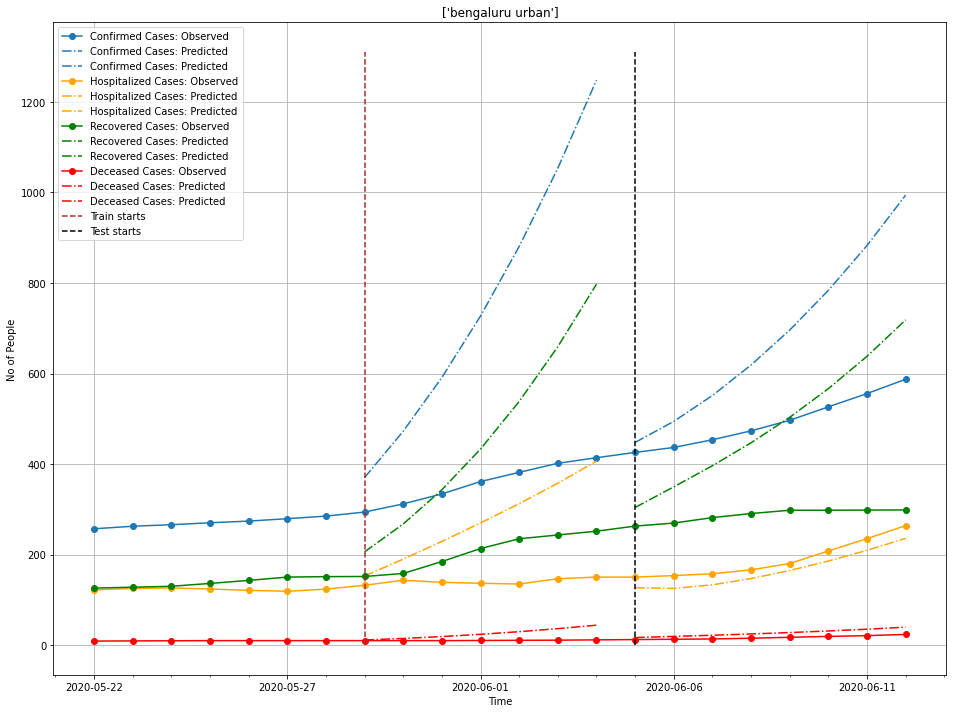

In [41]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = '../notebooks/plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90


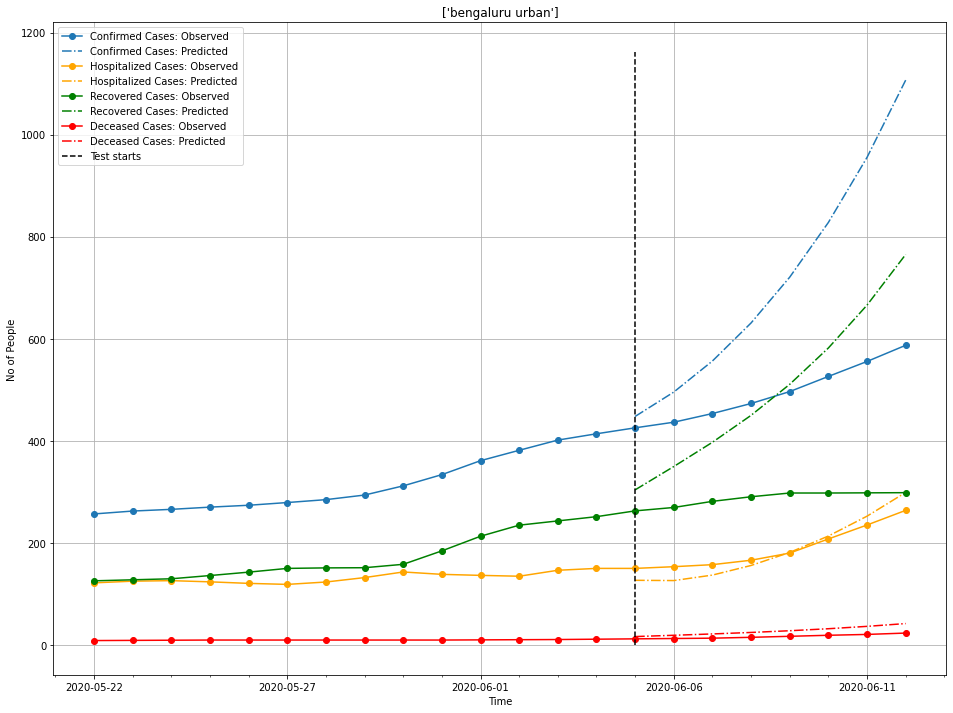

In [42]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = '../notebooks/plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90


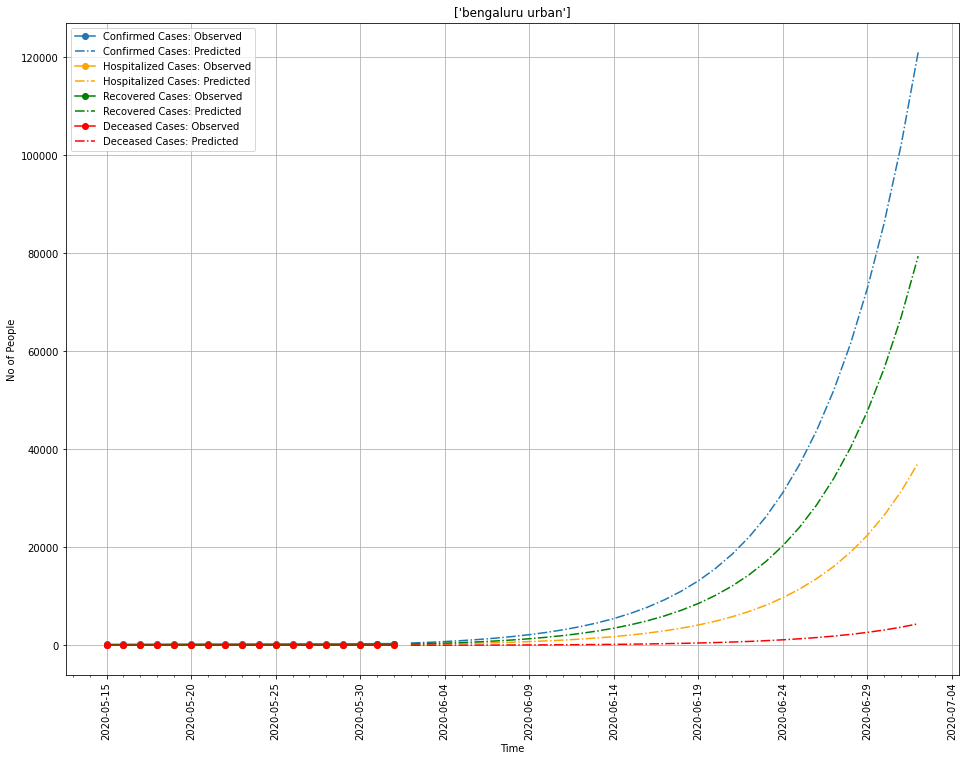

In [43]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = '../notebooks/plot_config.json', plot_name = 'm3.png')

In [44]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 3.0355865552573826,
     'F_fatalities': 0.05236163703523315,
     'F_hospitalization': 0.038389934344751075,
     'IbyCRatio': 1.3562231831212739,
     'beta': 0.6578217217815268,
     'infectious_period': 5.071749969688699,
     'r0': 3.4,
     'LatentEbyCRatio': {'5/28/20': 3.0355865552573826,
      '6/4/20': 1.309259396213552},
     'LatentIbyCRatio': {'5/28/20': 1.3562231831212739,
      '6/4/20': 0.3258005981661483}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 16.6326234653206,
     'F_fatalities': 0.08797400616905801,
     'F_hospitalization': 0.05013940078443814,
     'IbyCRatio': 1.8488568538775076,

In [45]:
train2_model_params['model_parameters']['modes']['predict_mode'] = 'with_uncertainty'

In [46]:
train2_model_params['model_parameters']['uncertainty_parameters'] = {
            "include_mean": "True",
            "percentiles": [10, 20, 30, 40, 50, 60, 70, 80, 90],
            "ci": 95,
            "date_of_interest": "6/3/20",
            "column_of_interest": "hospitalized",
            "window": 5
        }

In [47]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 3.0355865552573826,
     'F_fatalities': 0.05236163703523315,
     'F_hospitalization': 0.038389934344751075,
     'IbyCRatio': 1.3562231831212739,
     'beta': 0.6578217217815268,
     'infectious_period': 5.071749969688699,
     'r0': 3.4,
     'LatentEbyCRatio': {'5/28/20': 3.0355865552573826,
      '6/4/20': 1.309259396213552},
     'LatentIbyCRatio': {'5/28/20': 1.3562231831212739,
      '6/4/20': 0.3258005981661483}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 16.6326234653206,
     'F_fatalities': 0.08797400616905801,
     'F_hospitalization': 0.05013940078443814,
     'IbyCRatio': 1.8488568538775076,

In [48]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [49]:
pd.set_option("display.max_columns", None)
uncertainty_df

prediction_type,index,exposed,icu_mean,recovered_mean,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,active_10,hospitalized_10,icu_10,recovered_10,deceased_10,total_10,active_20,hospitalized_20,icu_20,recovered_20,deceased_20,total_20,active_30,hospitalized_30,icu_30,recovered_30,deceased_30,total_30,active_40,hospitalized_40,icu_40,recovered_40,deceased_40,total_40,active_50,hospitalized_50,icu_50,recovered_50,deceased_50,total_50,active_60,hospitalized_60,icu_60,recovered_60,deceased_60,total_60,active_70,hospitalized_70,icu_70,recovered_70,deceased_70,total_70,active_80,hospitalized_80,icu_80,recovered_80,deceased_80,total_80,active_90,hospitalized_90,icu_90,recovered_90,deceased_90,total_90,active_low,hospitalized_low,icu_low,recovered_low,deceased_low,total_low,active_high,hospitalized_high,icu_high,recovered_high,deceased_high,total_high
0,6/2/20,1238.445407,9.086006,272.942585,15.081408,469.744121,181.720128,181.720128,613.784296,288.023992,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121,181.720128,181.720128,3.634403,272.942585,15.081408,469.744121
1,6/3/20,1433.541613,11.824933,347.868916,19.221453,603.589031,236.498662,236.498662,746.355159,367.090369,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031,236.498662,236.498662,4.729973,347.868916,19.221453,603.589031
2,6/4/20,1679.448811,14.844964,443.600337,24.511080,765.010693,296.899276,296.899276,895.604087,468.111417,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693,296.899276,296.899276,5.937986,443.600337,24.511080,765.010693
3,6/5/20,1980.742374,18.233664,562.459763,31.078643,958.211688,364.673282,364.673282,1067.230299,593.538405,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,31.078643,958.211688,364.673282,364.673282,7.293466,562.459763,3